In [143]:
# importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [144]:
# read file
df = pd.read_csv('./data/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [145]:
print(f'No. of rows and colummns {df.shape}')

No. of rows and colummns (13320, 9)


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Data Cleaning

In [147]:
df_nft = df.copy()

In [148]:
def mysplit(s):
    '''
    value which is in correct conditon, can be copnvert easily ,
    replacing them with None to other value and learn about their format
    '''
    try:
        float(s)
    except:
        return s
    return np.nan
    
df_nft['total_area'] = df_nft['total_sqft'].apply(mysplit) 
df_nft['total_area'].unique()

array([nan, '2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156',
       '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740',
       '34.46Sq. Meter', '1195 - 1440', '1200 - 2400', '4125Perch',
       '1120 - 1145', '4400 - 6640', '3090 - 5002', '4400 - 6800',
       '1160 - 1195', '1000Sq. Meter', '4000 - 5249', '1115 - 1130',
       '1100Sq. Yards', '520 - 645', '1000 - 1285', '3606 - 5091',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '1440 - 1884', '716Sq. Meter',
       '547.34 - 827.31', '580 - 650', '3425 - 3435', '1804 - 2273',
       '3630 - 3800', '660 - 670', '1500Sq. Meter', '620 - 933',
       '142.61Sq. Meter', '2695 - 2940', '2000 - 5634', '1574Sq. Yards',
       '3450 - 3472', '1250 - 1305', '670 - 980', '1005.03 - 1252.49',
       '1004 - 1204', '361.33Sq. Yards', '645 - 936', '2710 - 3360',
       '2249.81 - 4112.19', '3436 - 3643', '2830 - 2882', '596 - 804',
       '1255 - 1863', '1300 - 1405

In [149]:
# converting range value
def convert(cell):
    unit_v = {'Sq. Meter':10.7639, 'Perch':272.25, 'Sq. Yards': 9, 
          'Acres': 43560, 'Cents' : 435.56, 'Guntha' : 1089,
          'Grounds' : 2400
         }
    lst =cell.split(' - ')
    if len(lst)==2:
        return np.average([float(a) for a in lst])
    try:
        return float(cell)
    except:
        tail = cell.lstrip('0123456789.')  
        sqft = float(cell.strip(tail)) * unit_v[tail]
        return str(sqft)

         
df['total_sqft'] = df['total_sqft'].apply(convert)

In [150]:
df['total_sqft'] = df['total_sqft'].astype('float64')

In [151]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [152]:
# removing all words contains in this section
df['bhk'] = df['size'].str.split(' ').str[0]
df['bhk'] = df['bhk'].astype('float64')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   bhk           13304 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.0+ MB


In [154]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [155]:
# simplipying avaibility column
def chng(row):
    if row == 'Ready To Move' or row == 'Immediate Possession':
        row = True
    else:
        row = False
    return row
    
df['ready'] = df['availability'].apply(chng)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   bhk           13304 non-null  float64
 10  ready         13320 non-null  bool   
dtypes: bool(1), float64(5), object(5)
memory usage: 1.0+ MB


In [157]:
df.drop(['availability','size','society'],axis='columns',inplace=True)

In [158]:
df.sample(3)

,area_type,location,total_sqft,bath,balcony,price,bhk,ready
614,Plot Area,Margondanahalli,940.0,4.0,2.0,150.0,5.0,True
12290,Super built-up Area,Whitefield,1220.0,2.0,1.0,55.0,2.0,True
7065,Built-up Area,Ashwathnagar,1100.0,2.0,2.0,55.0,2.0,True


## EDA

In [159]:
# calculating duplicate value
df.duplicated().sum()

657

In [160]:
# removing duplicate value
df = df.drop_duplicates()

In [161]:
df.shape

(12663, 8)

In [162]:
df.isnull().sum()

area_type       0
location        1
total_sqft      0
bath           72
balcony       604
price           0
bhk            16
ready           0
dtype: int64

In [163]:
(df.isnull().sum() / df.shape[0]) * 100

area_type     0.000000
location      0.007897
total_sqft    0.000000
bath          0.568586
balcony       4.769802
price         0.000000
bhk           0.126352
ready         0.000000
dtype: float64

In [164]:
df.describe()

,total_sqft,bath,balcony,price,bhk
count,1.266300e+04,12591.000000,12059.000000,12663.000000,12647.000000
mean,1.943055e+03,2.712970,1.584211,114.829794,2.822329
std,1.771844e+04,1.362165,0.824510,152.088248,1.316022
min,1.000000e+00,1.000000,0.000000,8.000000,1.000000
25%,1.100000e+03,2.000000,1.000000,50.000000,2.000000
50%,1.286000e+03,2.000000,2.000000,73.000000,3.000000
75%,1.699500e+03,3.000000,2.000000,122.750000,3.000000
max,1.306800e+06,40.000000,3.000000,3600.000000,43.000000


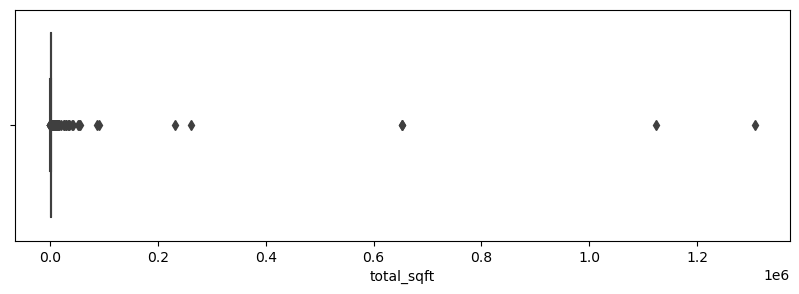

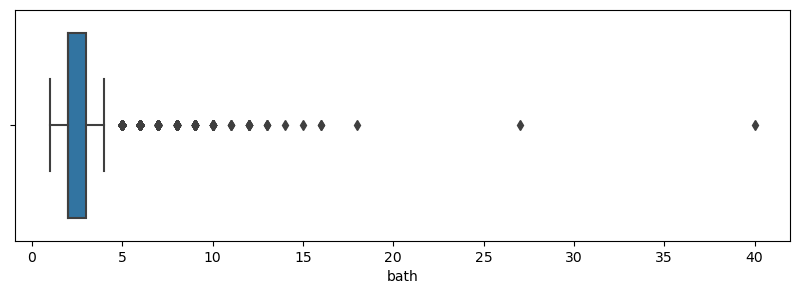

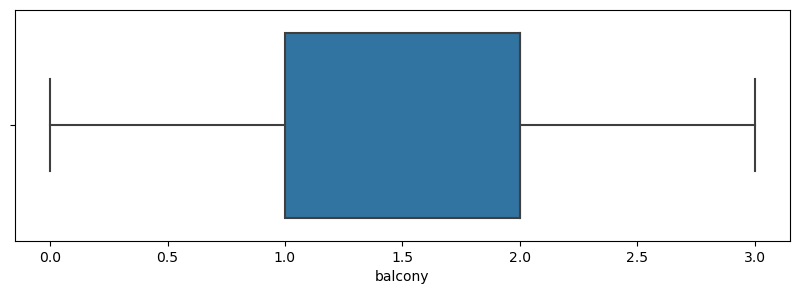

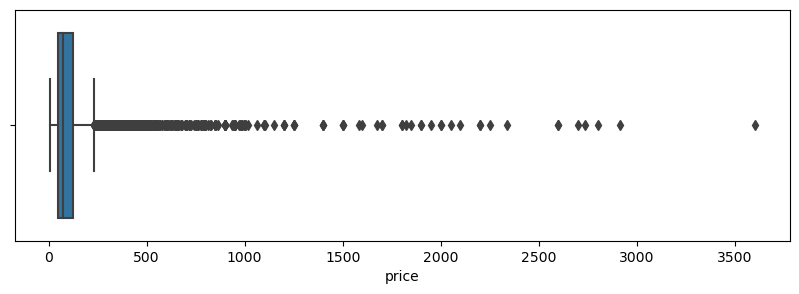

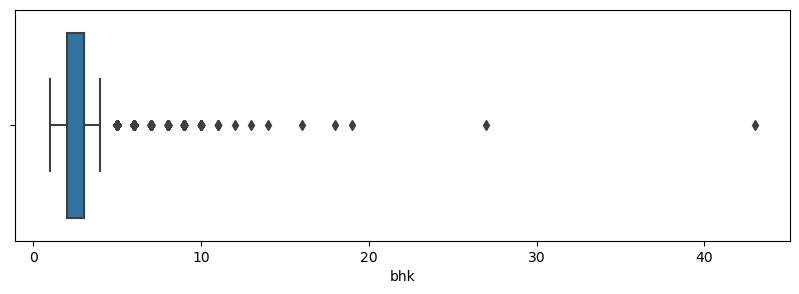

In [165]:
n_feature = [a for a in df.columns if df[a].dtypes == 'float64']
for f in n_feature:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df[f])
    plt.show()

Too many outlier in several column. Suggeseted method: __1.5 IQR.__

__Distribution of values__

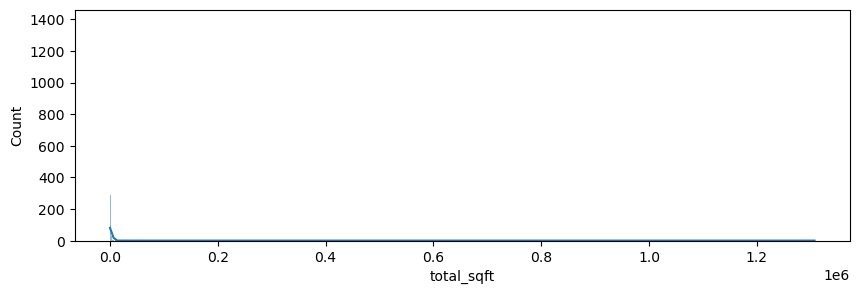

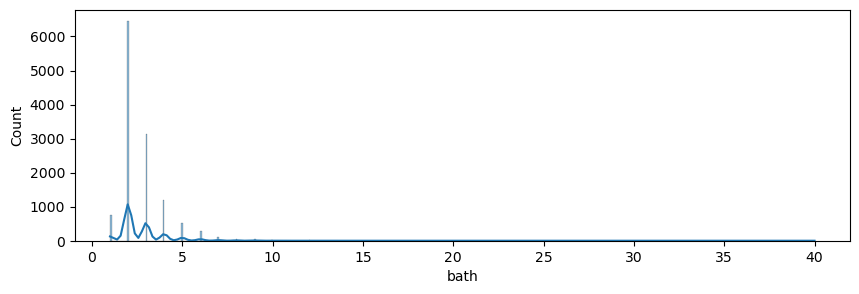

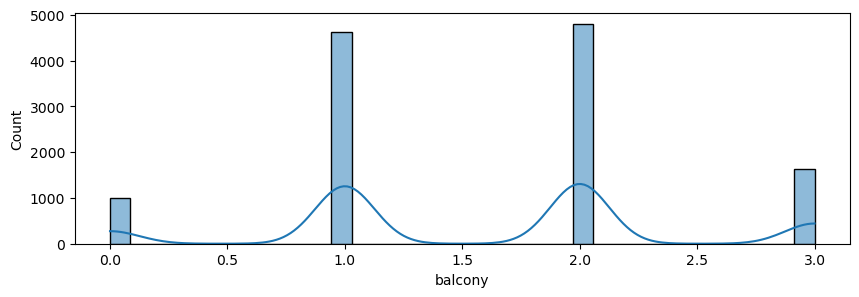

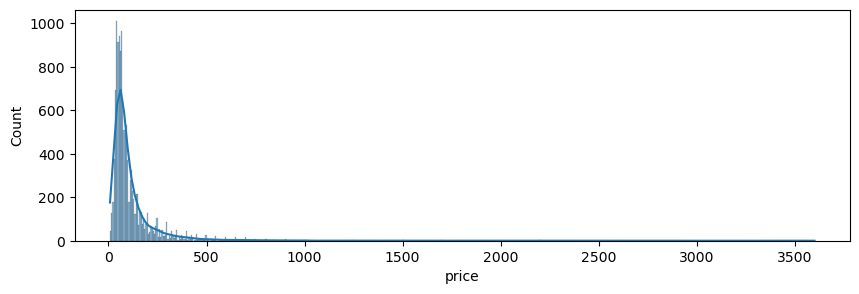

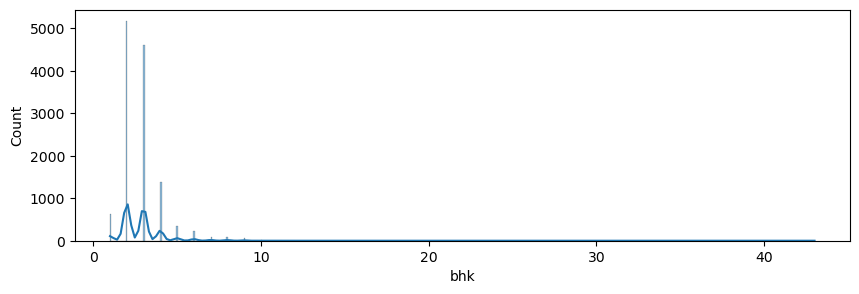

In [166]:
for f in n_feature:
    plt.figure(figsize=(10,3))
    sns.histplot(x=df[f],  kde=True)
    plt.show()

Distribution is not normal. suggested method: __boxcox__

In [167]:
c_feature = [a for a in df.columns if a not in n_feature]
c_feature 

['area_type', 'location', 'ready']

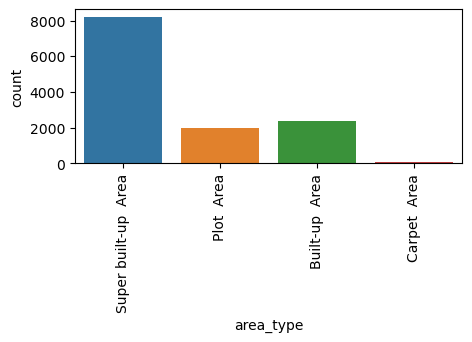

In [168]:
plt.figure(figsize=(5,2))
sns.countplot(x=df['area_type'])
plt.xticks(rotation=90)
plt.show()

In [169]:
location_count = df.location.value_counts()

In [170]:
df.location.nunique()

1305

In [171]:
location_count_20 = location_count[location_count > 20]

In [172]:
location_count_20.shape

(139,)

## FE

__Missing Value Handling__

In [173]:
l_mode = df.location.mode()
l_mode

0    Whitefield
Name: location, dtype: object

In [174]:
df['location'] = df.location.fillna('Whitefield')

In [175]:
df[df.location.isnull()]

,area_type,location,total_sqft,bath,balcony,price,bhk,ready


In [176]:
from sklearn.impute import KNNImputer
# data copy
train_knn = df.copy()

knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
train_knn[['bhk', 'bath', 'balcony']] = knn_imputer.fit_transform(train_knn[['bhk', 'bath', 'balcony']])

In [177]:
train_knn.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
ready         0
dtype: int64

In [178]:
df = train_knn

__Outlier Handling__

In [179]:
# For price

q1 = df.price.quantile(.25)
q3 = df.price.quantile(.75)
iqr = q3 - q1

In [180]:
u_fence = q3 + (1 * iqr)
l_fence = q1 - (1 * iqr)

u_fence,l_fence

(195.5, -22.75)

price can not be less than 0. so adjust l_fence = 0 

In [181]:
l_fence = 0

In [182]:
df = df[(df.price > l_fence )& (df.price <= u_fence)]

In [183]:
df.shape

(11082, 8)

In [184]:
# For total_sqft
q1 = df.total_sqft.quantile(.25)
q3 = df.total_sqft.quantile(.75)

iqr = q3 - q1

In [185]:
l_fence = q1 - (1.5 * iqr)
u_fence = q3 + (1.5 * iqr)
u_fence,l_fence

(2237.5, 377.5)

In [186]:
df = df[(df.total_sqft > l_fence )& (df.total_sqft <= u_fence)]
df.shape

(10506, 8)

In [187]:
# For BHK
q1 = df['bhk'].quantile(.25)
q3 = df['bhk'].quantile(.75)

iqr = q3 - q1

In [188]:
l_fence = q1 - (1.5 * iqr)
u_fence = q3 + (1.5 * iqr)
u_fence,l_fence

(4.5, 0.5)

House have atleast 1 bedroom. So l_fence set to 1

In [189]:
l_fence = 1

In [190]:
df = df[(df['bhk'] >= l_fence )& (df['bhk'] <= u_fence)]
df.shape

(10138, 8)

In [191]:
# For bath

df = df[df['bath'] <= df['bhk'] + 2]
df.shape

(10137, 8)

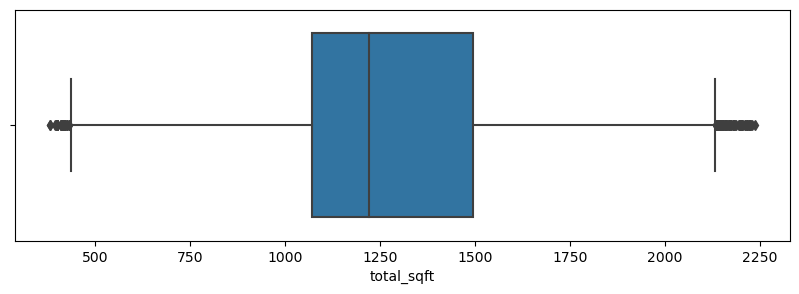

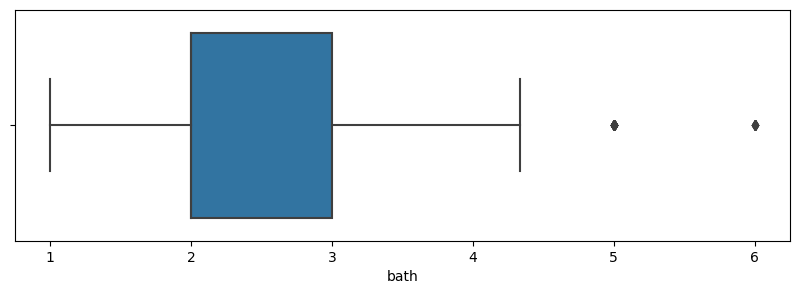

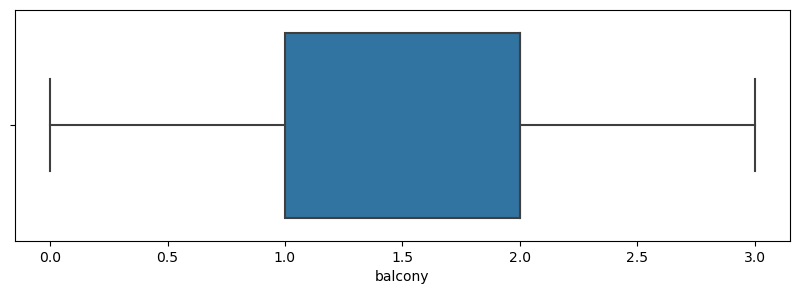

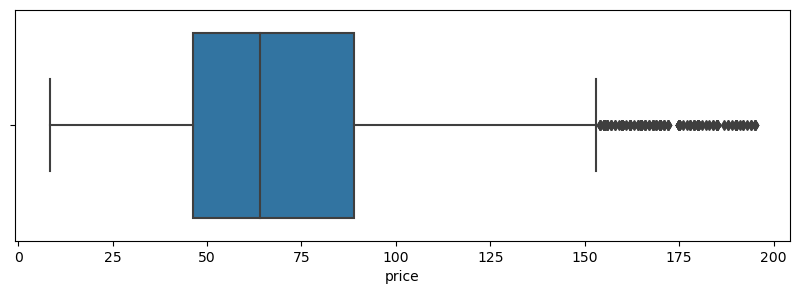

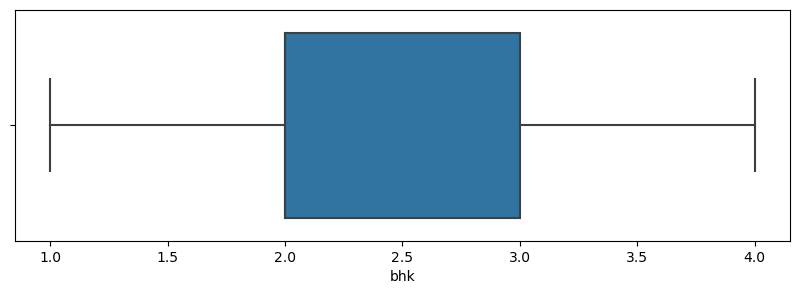

In [192]:
for f in n_feature:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df[f])
    plt.show()

Reduced in outlier no. 

In [193]:
df.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'price',
       'bhk', 'ready'],
      dtype='object')

In [194]:
# Location columns feature engineering
location_count_20

Whitefield            515
Sarjapur  Road        371
Electronic City       285
Kanakpura Road        230
Thanisandra           229
                     ... 
Domlur                 22
Basaveshwara Nagar     21
Choodasandra           21
Ulsoor                 21
Gunjur                 21
Name: location, Length: 139, dtype: int64

In [195]:
pr = df.copy()
pr['location'] = pr['location'].map(lambda x: 'other' if x not in location_count_20 else x)

In [196]:
pr['location'].value_counts()

other                 3126
Whitefield             393
Sarjapur  Road         296
Electronic City        278
Kanakpura Road         218
                      ... 
1st Phase JP Nagar      14
Ulsoor                  13
Basaveshwara Nagar      12
Old Airport Road        12
Iblur Village            8
Name: location, Length: 140, dtype: int64

In [197]:
df = pr

In [198]:
df.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'price',
       'bhk', 'ready'],
      dtype='object')

In [199]:
y = df['price']
x = df.drop('price',axis='columns')

__One Hot Encoding__

In [200]:
dummy = pd.get_dummies(x['location'])
x = pd.concat([x,dummy], axis='columns')

In [201]:
dummy = pd.get_dummies(x['area_type'])
x = pd.concat([x,dummy], axis='columns')

In [202]:
x

,area_type,location,total_sqft,bath,balcony,bhk,ready,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.000000,2.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Built-up Area,Uttarahalli,1440.0,2.0,3.000000,3.0,True,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.000000,3.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Super built-up Area,Kothanur,1200.0,2.0,1.000000,2.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Super built-up Area,Whitefield,1170.0,2.0,1.000000,2.0,True,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,Super built-up Area,Yeshwanthpur,1675.0,3.0,1.333333,3.0,True,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13310,Super built-up Area,Rachenahalli,1050.0,2.0,2.000000,2.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13312,Super built-up Area,Bellandur,1262.0,2.0,2.000000,2.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,3.000000,3.0,True,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [203]:
x.drop(['area_type','location'],axis='columns',inplace=True)

In [204]:
x

,total_sqft,bath,balcony,bhk,ready,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.000000,2.0,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1440.0,2.0,3.000000,3.0,True,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1521.0,3.0,1.000000,3.0,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1200.0,2.0,1.000000,2.0,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1170.0,2.0,1.000000,2.0,True,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,1675.0,3.0,1.333333,3.0,True,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13310,1050.0,2.0,2.000000,2.0,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13312,1262.0,2.0,2.000000,2.0,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13314,1715.0,3.0,3.000000,3.0,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [205]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [206]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [207]:
reg.predict(x_test)

array([62.27975464, 77.46911621, 48.30953979, ..., 64.84136963,
       83.15921021, 79.0715332 ])

In [208]:
y_test

6733      35.0
4893     100.0
11457     27.0
10322     96.0
3647     145.0
         ...  
2874     120.0
7156      50.0
13254     53.0
13214     85.0
599       85.0
Name: price, Length: 2028, dtype: float64

In [209]:
reg.score(x_test, y_test)

0.6131968769934794